In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("data/click/train.csv", nrows=100000)

In [3]:
# train_df.head()

In [4]:
unused_columns, label_column = ["id", "hour", "device_id", "device_ip"], "click"
train_df = train_df.drop(unused_columns, axis=1)

In [5]:
y_train = train_df[label_column]

In [6]:
test_df = pd.read_csv("data/click/train.csv", header=0, skiprows=(1, 100000), nrows=100000)

In [7]:
# test_df.head()

In [8]:
test_df = test_df.drop(unused_columns, axis=1)
y_test = test_df[label_column]

In [9]:
from sklearn.feature_extraction import DictVectorizer

In [10]:
X_dict_train = list(train_df.drop(label_column, axis=1).T.to_dict().values())
X_dict_test = list(test_df.drop(label_column, axis=1).T.to_dict().values())

In [11]:
vectorizer = DictVectorizer(sparse=True)
X_train = vectorizer.fit_transform(X_dict_train)
X_test = vectorizer.fit_transform(X_dict_test)

In [14]:
pkl_data = (X_train, y_train, X_test, y_test)
pd.to_pickle(pkl_data, 'data/click/click.pkl')

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [76]:
params = {"max_depth": [3, 10, None]}

In [77]:
tree = DecisionTreeClassifier(criterion="gini", min_samples_split=30)

In [79]:
grid_search = GridSearchCV(tree, params, n_jobs=-1, cv=3, scoring="roc_auc")

In [ ]:
grid_search.fit(X_train, y_train)

In [81]:
grid_search.best_params_

{'max_depth': 10}

In [102]:
tree_best = grid_search.best_estimator_

In [95]:
y_pred = decision_tree_best.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.83248

In [104]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[81151,  1359],
       [15393,  2097]], dtype=int64)

In [105]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.11989708404802744

In [106]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.20022916069894015

In [108]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = decision_tree_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

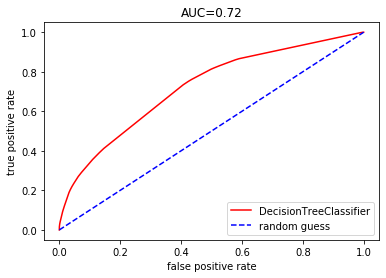

In [109]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, "r-", label="DecisionTreeClassifier")
plt.plot([0, 1], [0, 1], "b--", label="random guess")
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.title("AUC={0:.2f}".format(auc))
plt.legend(loc="lower right");
plt.show()